<a href="https://colab.research.google.com/github/adhang/learn-tensorflow/blob/main/CNN_Carelessness_in_Driving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN - Carelessness in Driving a Car

Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

# Libraries

In [ ]:
# file handling
import os
import shutil
from shutil import unpack_archive
import glob

# data manipulation
import numpy as np
import pandas as pd

# data viz
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

# tensorflow
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

# Reading Datasets

## Download Datasets

In [ ]:
# download image data
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/8c7bc0c59ee6bcdb3646a1997606a9d0/test.zip'
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/ffe8804da24b94ee410a8730ba297dfc/train_0.zip'
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/5460fcc87e2d7f7e19c17f719e0df00a/train_1.zip'

--2022-06-19 07:54:03--  https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/8c7bc0c59ee6bcdb3646a1997606a9d0/test.zip
Resolving hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)... 52.217.173.121
Connecting to hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)|52.217.173.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58948996 (56M) [application/zip]
Saving to: ‘test.zip’

test.zip            100%[===================>]  56.22M   103MB/s    in 0.5s    

2022-06-19 07:54:04 (103 MB/s) - ‘test.zip’ saved [58948996/58948996]

--2022-06-19 07:54:04--  https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/ffe8804da24b94ee410a8730ba297dfc/train_0.zip
Resolving hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)... 52.216.20.40
Connecting to hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)|52.216.20.40|:443... conne

## Extract Dataset

In [ ]:
# extract train dataset (with label)
print('Extracting Train Dataset : Label 0')
unpack_archive('train_0.zip', '')

print('Extracting Train Dataset : Label 1')
unpack_archive('train_1.zip', '')

# extract test dataset (without label)
print('Extracting Test Dataset')
unpack_archive('test.zip', '')

print('Dataset Extracted')

# remove original zip files
print('Removing Zip Files')
os.remove('train_1.zip')
os.remove('train_0.zip')
os.remove('test.zip')
print('Zip Files Removed')

# rename train dataset directory
print('Renaming Train Directory')
os.rename('train', 'data')

Extracting Train Dataset : Label 0
Extracting Train Dataset : Label 1
Extracting Test Dataset
Dataset Extracted
Removing Zip Files
Zip Files Removed
Renaming Train Directory


## Accessing Images

In [ ]:
# path to data (originally train set)
data_dir = '/content/data/'
data_0_dir = os.path.join(data_dir, '0')
data_1_dir = os.path.join(data_dir, '1')

# path to test set
test_dir = '/content/test'

### File Names

In [ ]:
data_0_names = os.listdir(data_0_dir)
print('Images with label 0')
print(data_0_names[:5])
print()

data_1_names = os.listdir(data_1_dir)
print('Images with label 1')
print(data_1_names[:5])
print()

test_names = os.listdir(test_dir)
print('Test images')
print(test_names[:5])

Images with label 0
['img_5264.jpg', 'img_64443.jpg', 'img_63151.jpg', 'img_68798.jpg', 'img_14715.jpg']

Images with label 1
['img_55108.jpg', 'img_31885.jpg', 'img_35327.jpg', 'img_1617.jpg', 'img_78675.jpg']

Test images
['img_64030.jpg', 'img_60142.jpg', 'img_11658.jpg', 'img_49198.jpg', 'img_12773.jpg']


### Total Files

In [ ]:
print('total image with label 0:', len(os.listdir(data_0_dir)))
print('total image with label 1:', len(os.listdir(data_1_dir)))
print('total test images:', len(os.listdir(test_dir)))

total image with label 0: 2026
total image with label 1: 1989
total test images: 1401


### Visualize

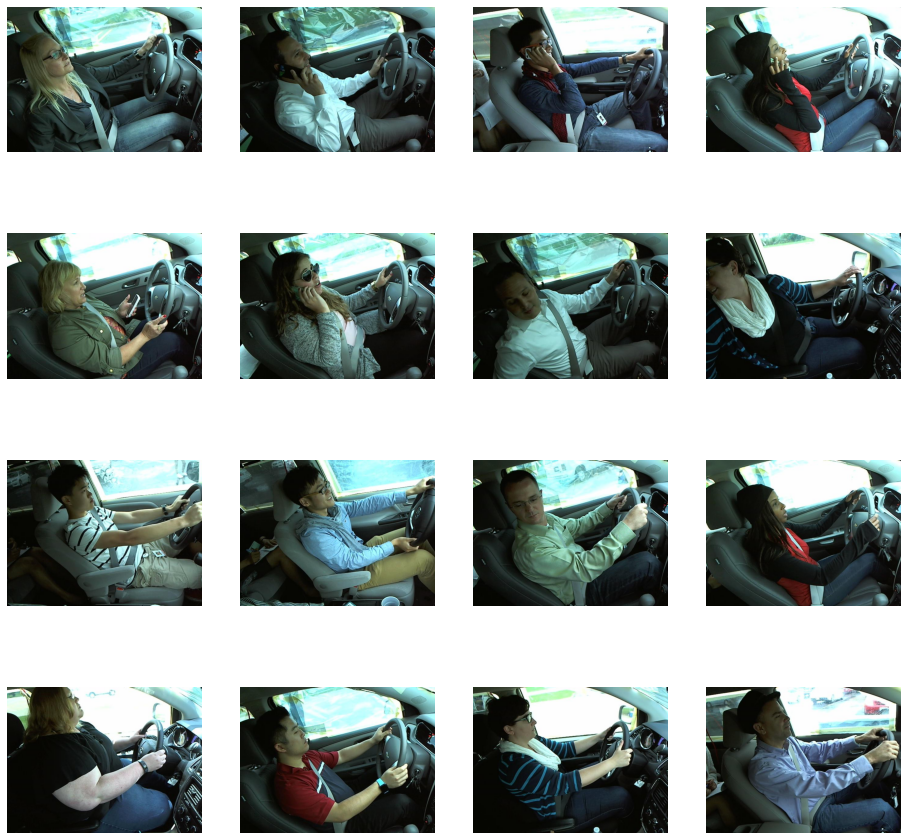

In [ ]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(data_0_dir, fname) 
                for fname in data_0_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(data_1_dir, fname) 
                for fname in data_1_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Data Preparation

## Create Validation Set

### Directory Preparation

In [ ]:
data_dir = '/content/data'
base_dir = '/content'

# path to the original dataset before splitting
data_dir = '/content/data/'
data_0_dir = os.path.join(data_dir, '0')
data_1_dir = os.path.join(data_dir, '1')

# path to the splitted dataset
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

In [ ]:
train_0_dir = os.path.join(train_dir, '0')
train_1_dir = os.path.join(train_dir, '1')

val_0_dir = os.path.join(val_dir, '0')
val_1_dir = os.path.join(val_dir, '1')

In [ ]:
# create the directory for storing the splitted dataset
os.mkdir(train_dir)
os.mkdir(val_dir)

# create the sub directory for storing the splitted dataset
os.mkdir(train_0_dir)
os.mkdir(train_1_dir)
os.mkdir(val_0_dir)
os.mkdir(val_1_dir)

### Splitting Dataset

In [ ]:
train_0_file, val_0_file = train_test_split(os.listdir(data_0_dir), test_size = 0.3, random_state=1)
train_1_file, val_1_file = train_test_split(os.listdir(data_1_dir), test_size = 0.3, random_state=1)

### Storing Splitted Dataset

In [ ]:
for file in train_0_file:
  shutil.copy(os.path.join(data_0_dir, file), os.path.join(train_0_dir, file))

for file in train_1_file:
  shutil.copy(os.path.join(data_1_dir, file), os.path.join(train_1_dir, file))

for file in val_0_file:
  shutil.copy(os.path.join(data_0_dir, file), os.path.join(val_0_dir, file))

for file in val_1_file:
  shutil.copy(os.path.join(data_1_dir, file), os.path.join(val_1_dir, file))

## Data Generator

### Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
  rescale = 1./255,
  rotation_range = 30,
  # width_shift_range=0.2,
  # height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip = True,
  # shear_range = 0.35,
  fill_mode = 'nearest',
)

# validation data should not be augmented
val_datagen = ImageDataGenerator(
  rescale = 1./255,
)

### Flow Images

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2810 images belonging to 2 classes.
Found 1205 images belonging to 2 classes.


# Model Development

## Neural Network 

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(256, activation= 'relu'),
  tf.keras.layers.Dense(1, activation= 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       36992     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

## Compile

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Fit

In [ ]:
history = model.fit(train_generator,
                    epochs = 10,
                    batch_size = 32,
                    validation_batch_size = 32,
                    validation_data = val_generator,
                    verbose = 1)

Epoch 1/10
88/88 [==============================] - 31s 338ms/step - loss: 0.7017 - accuracy: 0.5423 - val_loss: 0.6543 - val_accuracy: 0.6672
Epoch 2/10
88/88 [==============================] - 29s 334ms/step - loss: 0.6018 - accuracy: 0.6776 - val_loss: 0.4621 - val_accuracy: 0.7801
Epoch 3/10
88/88 [==============================] - 31s 349ms/step - loss: 0.4621 - accuracy: 0.7868 - val_loss: 0.3019 - val_accuracy: 0.8797
Epoch 4/10
88/88 [==============================] - 29s 334ms/step - loss: 0.3898 - accuracy: 0.8345 - val_loss: 0.4326 - val_accuracy: 0.7892
Epoch 5/10
88/88 [==============================] - 29s 333ms/step - loss: 0.3299 - accuracy: 0.8587 - val_loss: 0.1773 - val_accuracy: 0.9203
Epoch 6/10
88/88 [==============================] - 29s 332ms/step - loss: 0.2720 - accuracy: 0.8865 - val_loss: 0.1447 - val_accuracy: 0.9527
Epoch 7/10
88/88 [==============================] - 29s 334ms/step - loss: 0.2392 - accuracy: 0.9021 - val_loss: 0.1529 - val_accuracy: 0.9469

## Loss Viz

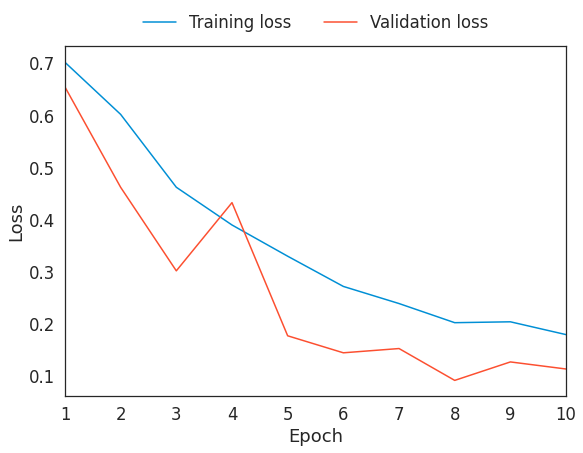

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1,len(history.history['loss'])+1)

sns.lineplot(x=epochs, y=history.history['loss'], 
             label='Training loss', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_loss'], 
             label='Validation loss', ax=ax)

ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_xlim(1, len(epochs))
ax.legend(loc='lower center', 
          bbox_to_anchor=(0.5, 1), 
          title='', ncol=2, frameon=False)

plt.show()

## Accuracy Viz

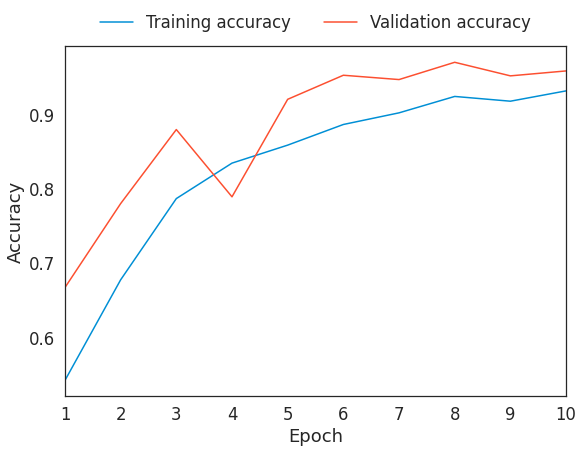

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1,len(history.history['accuracy'])+1)

sns.lineplot(x=epochs, y=history.history['accuracy'], 
             label='Training accuracy', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_accuracy'], 
             label='Validation accuracy', ax=ax)

ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_xlim(1, len(epochs))
ax.legend(loc='lower center', 
          bbox_to_anchor=(0.5, 1), 
          title='', ncol=2, frameon=False)

plt.show()

# Submission

## Prediction

[Code from here](https://gist.github.com/ritiek/5fa903f97eb6487794077cf3a10f4d3e)

In [ ]:
img_width, img_height = 150, 150

# load all images into a list
images = list()
image_names = list()
for img in glob.glob(os.path.join(test_dir, '*.jpg')):
  # save the file name
  image_names.append(os.path.basename(img))
  
  img = os.path.join(test_dir, img)
  img = image.load_img(img, target_size=(img_width, img_height))
  img = image.img_to_array(img)
  img = img/255.0
  img = np.expand_dims(img, axis=0)
  images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict(images, batch_size=10)
print(classes)

[[1.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [1.]]


## Save to CSV

In [ ]:
pred_list = list(zip(image_names, classes.astype(int).flatten()))
pred_df = pd.DataFrame(pred_list, columns=['file', 'label'])

pred_df.to_csv('submission.csv', index=False)